In [16]:
# Read in CDFS main data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

# df['SNR_IRAC_36'] = df['F3.6'] / df['e_F3.6']
# df['SNR_IRAC_45'] = df['F4.5'] / df['e_F4.5']
# df['SNR_IRAC_58'] = df['F5.8'] / df['e_F5.8']
# df['SNR_IRAC_80'] = df['F8.0'] / df['e_F8.0']
# df['SNR_MIPS_24'] = df['F24'] / df['e_F24']

# df = df[df['SNR_IRAC_36'] >= 1]
# df = df[df['SNR_IRAC_45'] >= 1]
# df = df[df['SNR_IRAC_58'] >= 1]
# df = df[df['SNR_IRAC_80'] >= 1]
# df = df[df['SNR_MIPS_24'] >= 1]

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


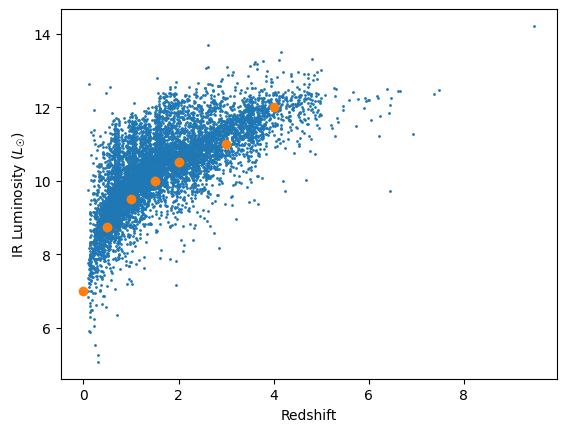

In [11]:
lir = np.log10(df['LIR'])
z = df['zpk']

x = np.array([0, 0.5, 1, 1.5, 2, 3, 4])
y = np.array([7, 8.75, 9.5, 10, 10.5, 11, 12])

plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.show()

4.636843107482375
0.5973937148693638
8.0778654521935
0.7117765529495679


C:\Users\n10480129\AppData\Local\Temp\ipykernel_21820\1827276094.py:4: RuntimeWarning: invalid value encountered in log10
  y = a * np.log10(x/d + b) + c


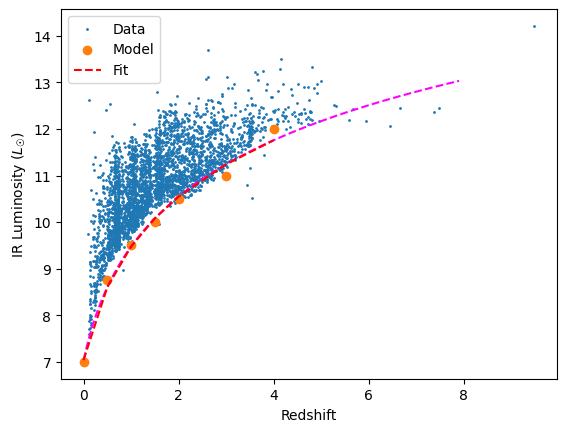

In [14]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    y = a * np.log10(x/d + b) + c 
    return y
    
p0 = [10, 1, 6, 1]

params, covars = curve_fit(func, x, y, p0=p0, maxfev=1000)

for p in params:
    print(p)
    
plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.plot(np.arange(0, 8, 0.1), func(np.arange(0, 8, 0.1), *params), linestyle='--', color='magenta')
plt.plot(x, func(x, *params), label='Fit', linestyle='--', color='red')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.legend()

# y = 5.336 * np.log10(x/0.652 + 0.768) + 6.586

Text(0, 0.5, 'IR Luminosity ($L_{☉}$)')

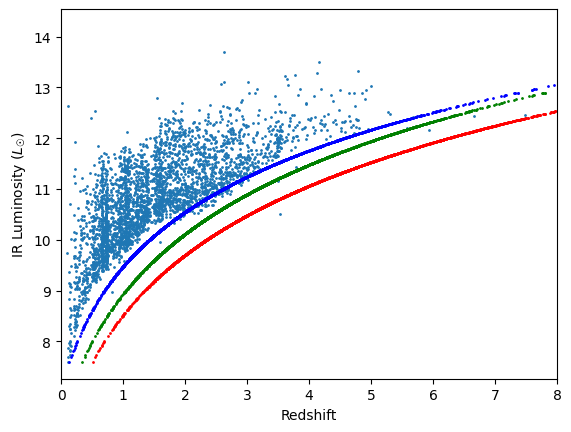

In [15]:
lum = np.log10(df['LIR'])
z = df['zpk']

# max_lum = 5.336 * np.log10(z/0.652 + 0.768) + 6.586
# max_lum3 = 4.636 * np.log10(z/0.711 + 0.597) + 8.077
max_z = 0.652 * (10 ** ((lum - 6.586) / 5.336) - 0.768)
max_z2 = 0.652 * (10 ** ((lum - 7) / 5.336) - 0.768)
max_z3 = 0.711 * (10 ** ((lum - 8.077) / 4.636) - 0.597)

plt.scatter(z, lum, s=1, label='Data')
plt.scatter(max_z, lum, s=1, label='Max Data', color='red')
plt.scatter(max_z2, lum, s=1, label='Max Data 2', color='green')
plt.scatter(max_z3, lum, s=1, label='Max Data 3', color='blue')
plt.xlim(0, 8)
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')

### Michael Code

C:\Users\n10480129\AppData\Local\Temp\ipykernel_20716\1160508820.py:6: RuntimeWarning: invalid value encountered in log10
  mag_ab = 25 - 2.5*np.log10(fks) # apparent magnitude -> AB magnitude


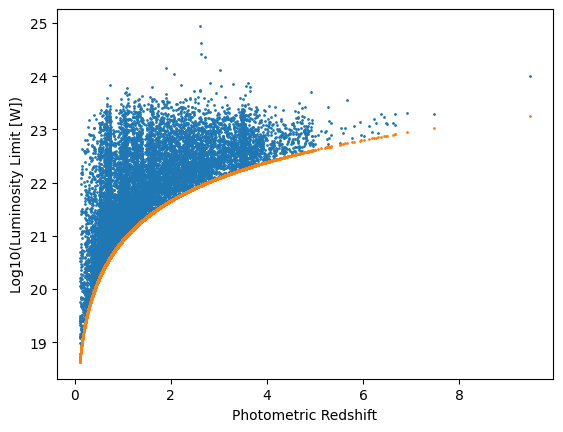

In [34]:
fks = df['FKs'].values # Ks band flux
cosmo = FlatLambdaCDM(H0=70, Om0=0.3) # cosmology
mag_lim = 25.9 # AB mag limit in Ks band

# Mask AB mag limit
mag_ab = 25 - 2.5*np.log10(fks) # apparent magnitude -> AB magnitude
mask = (mag_ab <= mag_lim)
fks = df['FKs'].values[mask]
z = df['zpk'].values[mask]

# Convert flux to luminosity
f = 0.3631 * fks * 10**-32  # uJy to W/m^2/Hz while considering ZP
d = cosmo.luminosity_distance(z).to(u.m).value # meters
l = 4 * np.pi * (d**2) * f # m^2 * W/m^2/Hz = W/Hz

# Luminosity limit
f_lim = 10 ** ((mag_lim + 56.1) / -2.5) # AB mag to to W/m^2/Hz
l_lim = 4 * np.pi * d **2 * f_lim  # Luminosity limit

plt.scatter(z, np.log10(l), s=1)
plt.scatter(z, np.log10(l_lim), s=1)
plt.xlabel('Photometric Redshift')
plt.ylabel('Log10(Luminosity Limit [W])')
plt.show()

### My version of michaels code

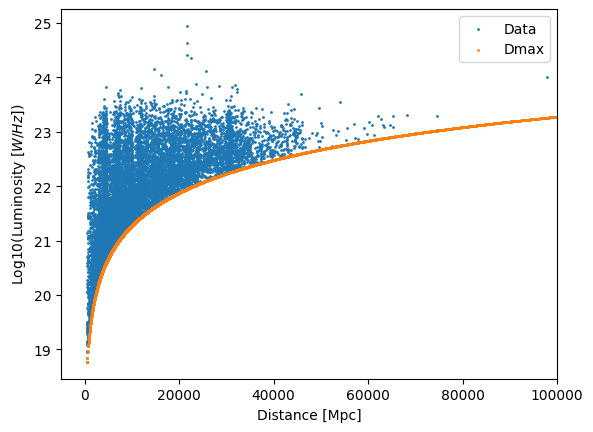

In [37]:
# Mask AB mag limit
mag_ab = 25 - 2.5*np.log10(df['FKs']) # apparent magnitude -> AB magnitude
mask = (mag_ab <= mag_lim)
fks = df['FKs'].values[mask] # apparent magnitude
z = df['zpk'].values[mask] # redshift

# Convert flux
f = 0.3631 * fks * 10**-32  # uJy -> W/m^2/Hz
f_lim = 10 ** ((mag_lim + 56.1) / -2.5) # AB mag -> W/m^2/Hz

# Luminosity Distance
d = cosmo.luminosity_distance(z).to(u.m).value # meters
luminosity = 4 * np.pi * (d**2) * f # m^2 * W/m^2/Hz = W/Hz

# Maximum luminosity distance
dmaxs = np.sqrt(luminosity / (4*np.pi*f_lim)) # meters
dmaxs *= 3.241 * 10 ** -23 # meters -> Mpc

# # Comoving Distance
# d_cm = cosmo.comoving_distance(z).to(u.m).value # meters
# lum_cm = 4 * np.pi * (d_cm**2) * f # m^2 * W/m^2/Hz = W/Hz

# # Maximum comoving distance
# d_cm_max = np.sqrt(lum_cm / (4*np.pi*f_lim)) # meters
# d_cm_max *= 3.241 * 10 ** -23 # meters -> Mpc

# Plot luminosity vs redshift
luminosity = np.log10(luminosity)
plt.scatter(d*3.241*10**-23, luminosity, s=1, label='Data')
plt.scatter(dmaxs, luminosity, s=1, label='Dmax')
# plt.scatter(d_cm_max, np.log10(lum_cm), s=1, label='Dmax_cm')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Log10(Luminosity [$W/Hz$])')
plt.xlim(-5000, 100000)
plt.legend()
plt.show()

### Updated Michael

C:\Users\n10480129\AppData\Local\Temp\ipykernel_20716\2224411332.py:2: RuntimeWarning: invalid value encountered in log10
  mag_ab = 25 - 2.5*np.log10(df['FKs'].values) # apparent magnitude -> AB magnitude


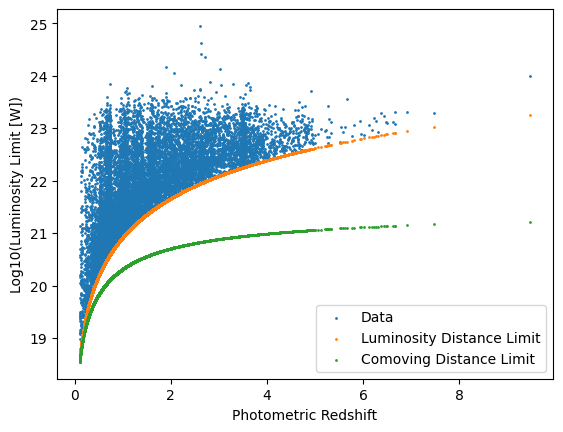

In [38]:
# Mask AB mag limit
mag_ab = 25 - 2.5*np.log10(df['FKs'].values) # apparent magnitude -> AB magnitude
mask = (mag_ab <= mag_lim)
fks = df['FKs'].values[mask]
z = df['zpk'].values[mask]

# Convert flux
f = 0.3631 * fks * 10**-32  # uJy -> W/m^2/Hz 
f_lim = 10 ** ((mag_lim + 56.1) / -2.5) # AB mag -> W/m^2/Hz

# Luminosity & limit
d = cosmo.luminosity_distance(z).to(u.m).value # meters
luminosity = 4 * np.pi * (d**2) * f # m^2 * W/m^2/Hz = W/Hz
lum_lim = 4 * np.pi * d **2 * f_lim  # m^2 * W/m^2/Hz = W/Hz

# Comoving distance luminosity & limit
d_cm = cosmo.comoving_distance(z).to(u.m).value # meters
luminosity_cm = 4 * np.pi * (d_cm**2) * f # m^2 * W/m^2/Hz = W/Hz
lum_lim_cm = 4 * np.pi * d_cm **2 * f_lim  # Luminosity limit

plt.scatter(z, np.log10(luminosity), s=1, label='Data')
plt.scatter(z, np.log10(lum_lim), s=1, label='Luminosity Distance Limit')
plt.scatter(z, np.log10(lum_lim_cm), s=1, label='Comoving Distance Limit')
plt.xlabel('Photometric Redshift')
plt.ylabel('Log10(Luminosity Limit [W])')
plt.legend()
plt.show()

dmaxs = np.sqrt(lum_lim / (4 * np.pi * f_lim)) * 3.241 * 10 ** -23 # m -> Mpc